# Investigación de operaciones con python

In [4]:
!pip install networkx simpy scipy pulp ortools

La investigación de operaciones en el ámbito del data science es un campo multidisciplinario que se centra en la aplicación de técnicas analíticas avanzadas para mejorar la toma de decisiones y la solución de problemas en organizaciones y empresas. Utiliza una variedad de métodos cuantitativos, incluyendo modelos matemáticos, estadística, y algoritmos de optimización, para analizar grandes conjuntos de datos y encontrar patrones y tendencias que puedan ser útiles para predecir comportamientos y resultados futuros. El objetivo principal es proporcionar soluciones basadas en datos que sean eficientes, efectivas y económicamente viables, mejorando así las operaciones y estrategias empresariales.

## ¿Qué es la investigación de operaciones?

La Investigación de Operaciones o Investigación Operativa es una disciplina que consiste en la aplicación de métodos analíticos avanzados con el propósito de apoyar el proceso de toma de decisiones, identificando las mejores rutas de acción posibles.

Utiliza técnicas de modelamiento matemático, análisis estadístico y optimización matemática, con el objetivo de alcanzar soluciones óptimas o cercanas a ellas cuando se enfrentan problemas de decisión complejos.

En término estrictos un modelo de optimización considera una función objetivo en una o varias variables que se desea maximizar ( por ejemplo el ingreso o beneficio asociado a un plan de producción ) o por el contrario minimizar (por ejemplo los costos de una firma, el riesgo asociado a una decisión, la pérdida de una alternatica, etc. ) Los valores que pueden adoptar las variables de decisión usualmente están limitados por restricciones que adoptan la forma de ecuaciones y/o inecuaciones que buscan representar las limitantes asociadas a la problemática

El enfoque principal de la investigación de operaciones es el modelaje. Un modelo es una herramienta analítica que nos sirve para lograr una visión bien estructurada de la realidad. así, el propósito del modelo es proporcionar un medio para analizar el comportamiento de las componentes de un sistema con el fin de optimizar su desempeño (identificar el mejor curso de acción posible).


## Historia

La historia de la investigación de operaciones (IO) se remonta a principios del siglo XX, pero adquirió su importancia significativa durante la Segunda Gruerra Mundial:

1. **Origenes Tempranos:** Antes de la Segunda Guerra Mundial, los inicios tempranos de la Investigación de Operaciones (IO) estaban fundamentalmente ligados a esfuerzos por aumentar la eficiencia y la productividad en diferentes industrias, aunque en ese momento la IO como tal no estaba formalmente reconocida como un campo de estudio independiente. Algunos de los desarrollos clave y sus aplicaciones más características son:
   1. **Frederick W. Taylor y la Gestión Científica:** A principios del siglo XX, Frederick W. Taylor introdujo los principios de la gestión científica, que buscaban mejorar la eficiencia laboral mendiante la optimización de tareas y procesos. Taylor utilizó estudios de tiempo y movimiento para analizar las tareas laborales, lo cual puede considerarse una de las primeras aplicaciones de los principios de la IO.
   2. **Henry L. Gantt:** Henry Gantt, contemporáneo de Taylor, desarrolló el famoso Diagrama de Gantt alrededor de 1910. Este era una herramienta de planificación y programación de proyectos que ayudaba a visualizar la duración y la secuencia de las actividades, un concepto que sigue siendo fundamental en la IO moderna.
   3. **Trabajos de L.H.C Tippett y E.S. Pearson:** En la decada de 1920, L.H.C. Tippett en el Reino Unido aplicó técnicas estadísiticas para mejorar los procesos de control de calidad en la industria textil. Al mismo tiempo, E.S. Person desarrolló el control de calidad mediante gráficos de control, un método para monitorear y controlar procesos de producción.
   4. **Aplicaciones en la industria Telefónica y Generación de Energía:** Antes de la Segunda Guerra Mundial, la IO también encontró aplicaciones en la industria telefónica, especialmente en la optimización de redes telefónicas y en la gestión del tráfico de llamadas. Además, en la industria de la generación de energía eléctrica se utilizaron métodos para optimizar la producción y la distribución.

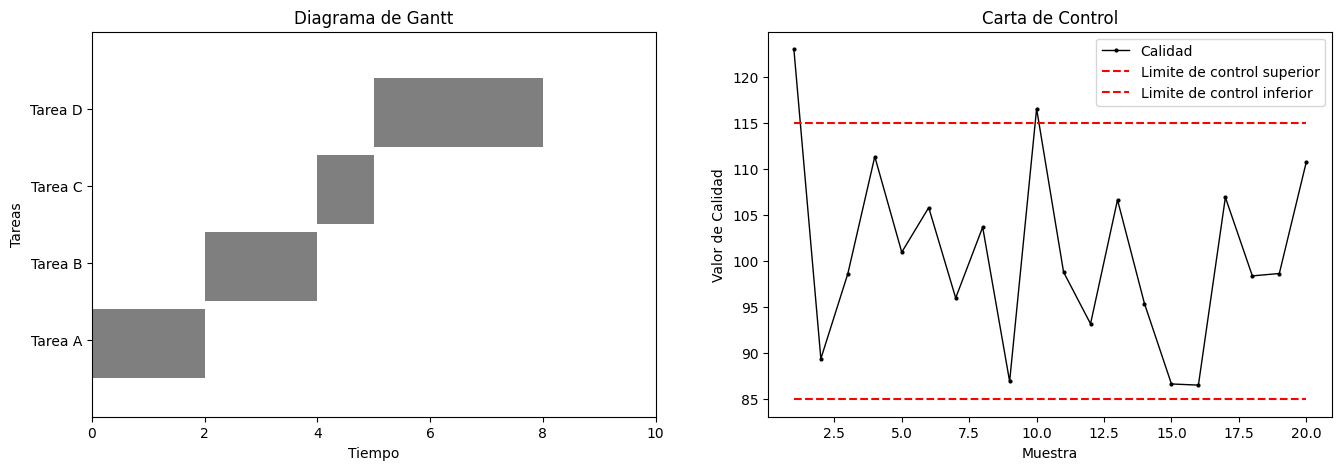

In [39]:
# @title Ejemplos
import matplotlib.pyplot as plt
import numpy as np
import math

# Ejemplo de diagrama de Gantt con tareas y duraciones.

tareas = ["Tarea A", "Tarea B", "Tarea C", "Tarea D"]
inicios = [0,2,4,5]
duraciones = [2,2,1,3]

fig, ax = plt.subplots(1,2, figsize=(16,5))

# fig, ax[0] = plt.subplots()

ax[0].set_ylim(0,5)
ax[0].set_xlim(0,10)
ax[0].set_xlabel("Tiempo")
ax[0].set_ylabel("Tareas")

ax[0].set_yticks([1,2,3,4])
ax[0].set_yticklabels(tareas)
ax[0] = ax[0]
# ax[0].grid(True)

for i in range(len(tareas)):
    ax[0].broken_barh([(inicios[i], duraciones[i])],(i+ 0.5,0.9), facecolors = ("#7f7f7f"))

# ax[0].grid(False)
ax[0].set_title("Diagrama de Gantt")

# Ejemplo, carta de control.

muestras = np.arange(1,21)
n = len(muestras)
m = 100
s = 10
w = 15
valores_calidad = np.random.normal(m,s,n)
limite_control_superior = [m + w]*n
limite_control_inferior = [m - w]*n

ax[1].plot(muestras, valores_calidad, marker = 'o', markersize = 2,color = 'k', label = 'Calidad', lw = 1)
ax[1].plot(muestras,limite_control_superior, 'r--', label = 'Limite de control superior')
ax[1].plot(muestras,limite_control_inferior, 'r--', label = 'Limite de control inferior')
ax[1].set_xlabel('Muestra')
ax[1].set_ylabel('Valor de Calidad')
ax[1].set_title('Carta de Control')
ax[1].legend(loc="best")
plt.show()


2. **Desarrollo Durante la Segunda Guerra Mundial:** La IO se desarrolló considerablemente durante la Segunda Guerra Mundial. Ene el Reino Unido y Estados Unidos, Equipos de cietíficos y matemáticos se formaron para resolver problemas complejos relacionados con la logística u las estrategias militares. Por ejemplo, trabajaron en la optimización de rutas de convoyes, estrategias de bombardeo, y la distribución de recursos. Estas actividades marcaron el nacimiento formal de la IO como una disciplina científica.

   Durante la segunda guerra mundial, La Investigación de Operaciones Esperimentó avances significativos, ya que se utilizó ampliamente para resolve problema complejos relacionados con la logística y las estrategias militares. A continuación, se detallan algunos de los avances más notables.
   
   1. **Optimización de Rutas de Convoyes:** Uno de los primeros y más famosos problemas abordados fue la optimización de las rutas de los convoyes marítimos aliados para minimizar las pérdidas por ataques submarinos alemanes. Se desarrollaron modelos para determinar las rutas más seguras y eficientes.
   
   2. **Estrategias de Bombardeo Aéreo:** La IO se utilizó para analizar y mejorar las estrategias de bombardeo aéreo. Esto incluía determinar los objetivos más efectivos, la cantidad de aviones necesarios, y las formaciones óptim
   
   3. **Asignación de Recursos:** Se desarrollaron modelos para la asignación eficiente de recursos limitados, como armamentos, personal, y suministros. Esto era crucial para asegurar que los frentes de batalla estuvieran edecuadamente equipados.

   4. **Teoría de Colas:** Se aplicó la teoría de colas para mejorar la eficiencia en operaciones como el abastecimiento de combustible y municiones, y el mantenimiento de vehículos y aeronaves. Esta teoría ayudó a reducir los tiempos de espera y aumentar la disponibilidad de recursos críticos.

   5. **Técnicas de Búsqueda y Detección:** Se desarrollaron técnicas para optimizar la búsqueda y detección de submarinos enemigos. Esto incluía patrones de búsqueda y estrategias para desplegar barcos y aviones de manera eficiente.

   6. **Análisis de Supervivencia y Daño:** La IO se utilizaó para analizar los patrones de daño que regresaban de misiones de combate, lo que ayudó a mejorar el diseño y la armadura de los aviones.

   7. **Simulación de Batallas:** Se desarrollaron modelos y simulaciones para predecir los resultados de diferentes estrategias de combate. Esto permitió a los comandantes militares evaluar varias opciones antes de comprometerse con un plan de acción.

   Estos avances y aplicaciones de la IO dura

### Ejemplos


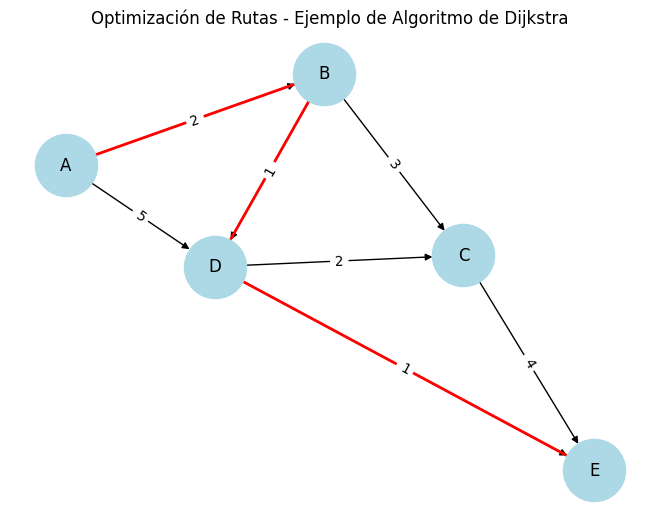

In [41]:
# @markdown
import networkx as nx
import matplotlib.pyplot as plt

# Creación de un gráfico para la optimización de rutas
G = nx.DiGraph()
edges = [("A", "B", 2), ("B", "C", 3), ("A", "D", 5), ("D", "C", 2),
         ("B", "D", 1), ("C", "E", 4), ("D", "E", 1)]
G.add_weighted_edges_from(edges)

# Uso del algoritmo de Dijkstra para encontrar la ruta más corta
path = nx.dijkstra_path(G, source="A", target="E")

# Visualización del gráfico y la ruta más corta
pos = nx.spring_layout(G)  # Posicionamiento de los nodos
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000)
path_edges = list(zip(path, path[1:]))
nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2)
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'weight'))

plt.title("Optimización de Rutas - Ejemplo de Algoritmo de Dijkstra")
plt.show()


Entidad 1 llega en el minuto 3.45
Entidad 1 espera 0.00 minutos
Entidad 1 deja el servicio en el minuto 15.72
Entidad 2 llega en el minuto 35.88
Entidad 2 espera 0.00 minutos
Entidad 3 llega en el minuto 42.58
Entidad 4 llega en el minuto 43.46
Entidad 5 llega en el minuto 43.84
Entidad 2 deja el servicio en el minuto 43.86
Entidad 3 espera 1.28 minutos
Entidad 3 deja el servicio en el minuto 45.42
Entidad 4 espera 1.96 minutos
Entidad 4 deja el servicio en el minuto 49.64
Entidad 5 espera 5.80 minutos
Entidad 5 deja el servicio en el minuto 58.85
Entidad 6 llega en el minuto 70.39
Entidad 6 espera 0.00 minutos
Entidad 6 deja el servicio en el minuto 83.85
Entidad 7 llega en el minuto 98.98
Entidad 7 espera 0.00 minutos


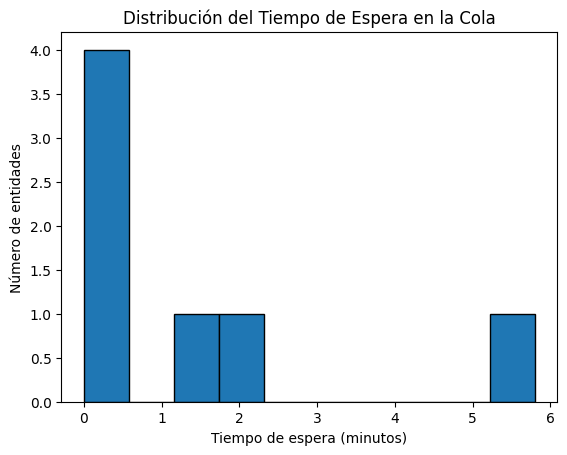

In [48]:
import simpy
import random
import matplotlib.pyplot as plt

# Parámetros para la simulación
tiempo_promedio_entre_llegadas = 10 # @param {type:"slider", min:0, max:10, step:1}
tiempo_promedio_servicio = 9 # @param {type:"slider", min:0, max:10, step:1}
tiempo_simulacion = 100 # @param

# Datos para análisis
tiempos_de_espera = []

# Definición del proceso de servicio en la cola
def proceso_servicio(env, nombre, contador):
    """Un proceso que representa la llegada y el servicio de una entidad."""
    llegada = env.now
    print(f'{nombre} llega en el minuto {llegada:.2f}')

    with contador.request() as req:
        yield req

        espera = env.now - llegada
        tiempos_de_espera.append(espera)
        print(f'{nombre} espera {espera:.2f} minutos')

        tiempo_servicio = random.expovariate(1.0 / tiempo_promedio_servicio)
        yield env.timeout(tiempo_servicio)
        print(f'{nombre} deja el servicio en el minuto {env.now:.2f}')

# Función para correr la simulación
def run_simulacion(env, contador):
    i = 0
    while True:
        yield env.timeout(random.expovariate(1.0 / tiempo_promedio_entre_llegadas))
        i += 1
        env.process(proceso_servicio(env, f'Entidad {i}', contador))

# Crear el entorno y correr la simulación
env = simpy.Environment()
contador = simpy.Resource(env, capacity=1)
env.process(run_simulacion(env, contador))
env.run(until=tiempo_simulacion)

# Análisis y visualización de resultados
plt.hist(tiempos_de_espera, bins=10, edgecolor='black')
plt.xlabel('Tiempo de espera (minutos)')
plt.ylabel('Número de entidades')
plt.title('Distribución del Tiempo de Espera en la Cola')
plt.show()


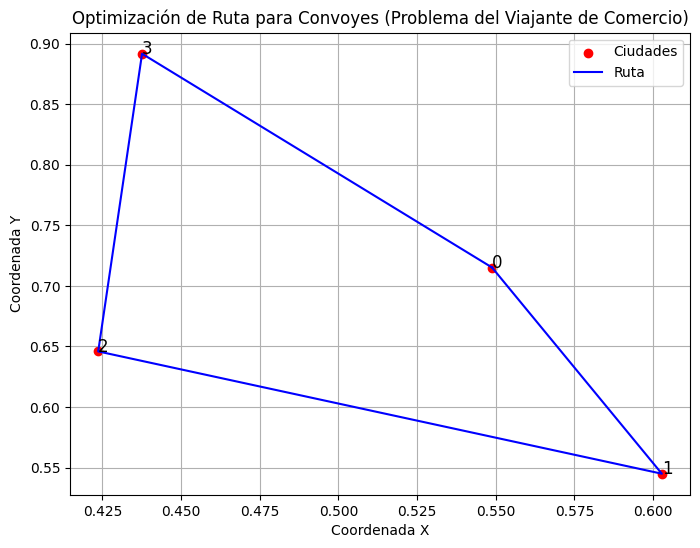

In [61]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import pdist, squareform
from scipy.optimize import linear_sum_assignment

# Generando un conjunto de ciudades (puntos) aleatorios
np.random.seed(0)
num_cities = 4 # @param
cities = np.random.rand(num_cities, 2)

# Calculando la matriz de distancias
distance_matrix = squareform(pdist(cities, metric='minkowski'))

# Resolviendo el problema del viajante de comercio aproximadamente
# Utilizando el algoritmo de asignación lineal (Hungarian algorithm)
row_ind, col_ind = linear_sum_assignment(distance_matrix)

# Creando la ruta (incluyendo el retorno al punto de origen)
route = np.append(col_ind, col_ind[0])

# Dibujando la ruta
plt.figure(figsize=(8, 6))
plt.scatter(cities[:, 0], cities[:, 1], c='red', label='Ciudades')
plt.plot(cities[route, 0], cities[route, 1], c='blue', label='Ruta')

# Etiquetando las ciudades
for i, city in enumerate(cities):
    plt.text(city[0], city[1], str(i), fontsize=12)

plt.title('Optimización de Ruta para Convoyes (Problema del Viajante de Comercio)')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.legend()
plt.grid(True)
plt.show()


3. **Posguerra y Expansión de la industria** Después de la segunda Guerra Mundial, la Investigación de Operaciones experimentó una expansión significativa y una serie de avances importantes, particularmente en el sector industrial y empresarial. Durante este período, se desarrollaron y aplicaron varios modelos y técnicas que se convirtieron en característicos de la disciplina.

  **Avances:** Transición de las aplicaciones militares a problemas industriales y comerciales.

  **Modelos y aplicaciones**
  + Gestión de inventarios
  
  + Programación de la predicción
  
  + Asignación de recursos, y problemas de transporte.

  Algunos ejemplos son el modelo de inventarios de wilson y la programación lineal.

## Modelado de Problemas

Identificación de Problemas:

### Reconocer situaciones para el modelado IO
 Para reconocer las situaciones adecuadas para el modelado de IO, es útil considerar algunos aspectos:
  1. **Problemas de toma de decisiones complejos:** La IO es ideal para situaciones donde se deben tomar decisiones complejas, especialemente cuendo estas decisiones involucran múltiples variables y restricciones. Por ejemplo, la asignación óptima de recursos en una empresa, la programación de horarios de trabjao, o la gestión de cadenas de suministro.
  
  2. **Disponiblidad de datos cuantitativos:** Los modelos de IO suelen basarse en datos cuantitativos. Es importante que haya datos disponibles y que sean confiables, ya sean históricos o pronósticados.
  
  3. **Existencia de objetivos claros:** Los modelos de IO requieren que los objetivos del problema estén bien definidos, como maximizar beneficios, minimizar costos, o mejorar la eficiencia.
  
  4. **Sistemas con múltiples alternativas y restricciones:** Si hay varias formas de abordar un problema y estas están sujetas a restricciones (como presupuestos, capacidad, tiempo, etc.), la IO puede ser una herramienta útil para evaluar estas alternativas.

  5. **Necesidad de optimización:** Cuando el objetivo es encontrar la mejor solución posible dentro de un conjunto de opciones factibles, los métodos de IO son especialmente útiles. Esto incluye problemas de optimización líneal, no lineal, entera, dinámica, entre otros.

  6. **Escenarios con incertidumbre y riesgo:** La IO también ofrece herramientas para modelar y analizar situaciones inciertas, como la teoría de juegos, la simulación de MonteCarlo y los Modelos Estocásticos.

  7. **Interacción de múltiples factores o agentes:** Situaciones donde interactúan varios actores o factores, como en la logística de transporte, la gestión de inventarios o la planificación estratégica, pueden beneficiarse del análisis de IO.

  8. **Problemas escalables y repetitivos:** Si un problema es recurrente o puede escalarse a situaciones más grandes o diferentes, desarrollar un modelo de IO puede ser una inversión valios, ya que el modelo puede ajustarse y reutilizarse.

  9. **Evaluación y comparación de políticas o estrategias:** Cuando se requiere evaluar el impacto de diferentes políticas o estrategias (por ejemplo, en políticas públicas, estrategias de mercado, etc.) la IO puede proporcionar un marco cuantitativo para la comparación.

  La IO es adecuada para situaciones donde la toma de decisiones es compleja y se beneficia de un enfoque analítico y basado en datos. La clave es identificar problemas que no solo sean complejos, sino que ta,bién se presten a un análisis cuantitativo y sistemático.

### Formulación Matemática
  
  La formulación matemática en Investigación de operaciones es un paso crucial pra modelar y resolver problemas complejos de toma de decisiones. A continuación, veamos los pasos básicos para la formulación matemática de algunos problemas comunes en IO:

#### Programación Lineal (PL):
**Problema:**  Optimizar una función Lineal sujeta a restricciones lineal

**Función Objetivo:** $ Z = c_1x_1 + c_2x_2 + \dots +c_nx_n$

**Restricciones:**


* $a_{11}x_1 + a_{12}x_2 + \dots + a_{1n}x_n\le b_1$

* $a_{21}x_1 + a_{22}x_2 + \dots + a_{2n}
x_n\le b_2$

* $\vdots$

* $a_{m1}x_1 + a_{m2}x_2 + \dots + a_{mn}x_n\le b_m$


**Variables:** $x_1, x_2, \dots ,x_n \ge 0$

#### Programación Entera (PE)

**Problema:** Similar a la PL, pero algunas o todas las variables de decisión son enteras.

**Función Objetivo y restricciones:** Igual que en PL

**Variables:** $x_1, x_2, \dots, x_n$ son enteras



#### Problema de transporte

**Problema:** Minimizar el costo de transportar mercancías desde múltiples orígenes a múltiples destinos.

**Función Objetivo:** Minimizar $\sum_{i = 1}^{m}{\sum_{j = 1 }^{n}{c_{ij}x{ij}}}$

**Restricciones:**
* Oferta: $\sum_{j=1}^{n}{x_ij} \le \text{Oferta}_i$ para cada origen $i$
* Demanda: $\sum_{i=1}^{m}{x_ij} \ge \text{Demanda}_j$ para cada destino $j$

**Variables:** $x_{ij}\ge0$

#### Problema de asignación

**Problema:** Asignar recursos tareas de manera óptima.

**Función Objetivo:** Minimizar o maximizar $\sum_{i = 1}^{m}{\sum_{j = 1}^{n}{c_{ij}x_{ij}}}$

**Restricciones:**
* $\sum_{j = 1}^{n}{ x_{ij} }=1$ para cada recurso $i$
* $\sum_{i = 1}^{m}{ x_{ij} }=1$ para cada tarea $j$

**Variables:** $x_{ij}$ es binaria $\in \{0,1\}$

#### Problemas de Ruteo de Vehículos (VRP)

**Problema:** Determinar las rutas óptimas para una flota de vehículos que deben visitar un conjunto de ubicaciones.

**Función Objetivo:** Minimizar el costo total o la distancia Recorrida.

**Restricciones:**
* Restricciones de capacidad de los vehículos.

* Cada cliente debe ser visitado una sola vez.

* Restricciones de tiempo o ventanas de tiempo.

**Variables:** Pueden incluir variables de asignación y variables de secuencia.

#### Problema de Programación de Horarios
**Problema:** Asignar horarios a recursos (por ejemplo, clases a aulas, empleados a turnos).

**Función Objetivo:** Generalmente es minimizar el costo o maximizar la eficiencia

**Restricciones:**
* Disponibilidad de recursos.
* Restricciones de capacidad o competencia.
* Preferencias o requisitos específicos.

**Variables:** Varaibles que indican asignaciones y tiempos.

#### Consejos Generales para la Formulación

* **Definir claramente las variables de decisión**
* **Establecer la función Objetivo** que refleje el objetivo del problema (minimizar costos, maximizar beneficios, etc.).
* **Identificar y formular las restricciones** que limitan las decisiones posibles.
* **Considerar la naturaleza de las variables** (continuas, enteras, binarias)


## Programación Lineal

### Definición

La programación Lineal es un métdo para alcanzar el mejor resultad posible (como máximo beneficio o menor costo) en un modelo matemáticos cuyos requisitos está representados por relaciones lineal.

### Componentes clave.

* **Variables de decisión:** Representan las decisiones a tomar. Por ejemplo, cuántas unidades de un producto fabricar.

* **Función Objetivo:** Es la función que busca maximizar o minimizar. Por ejemplo, maximizar ganancias o minimizar los costos.

* **Restricciones:** Son las limitaciones o requisitos del problema, como recursos limitados o capcidades de producción.

### Propiedades de un Modelo de PL:

* Linealidad en la relación entre variables.
* Soluciones en un espacio de decisión convexo.
* Posibilidad de múltiples soluciones óptimas o ninguna,

#### Formulación Matemática

1. **Estructura de un Modelo Típico:**
   - Función objetivo: $\max (o \min) \; Z = c_1x_1 + c_2x_2 + \cdots + c_nx_n$
   - Sujeto a:
     - $a_{11}x_1 + a_{12}x_2 + \cdots + a_{1n}x_n \leq (o \geq, =) b_1$
     - $a_{21}x_1 + a_{22}x_2 + \cdots + a_{2n}x_n \leq (o \geq, =) b_2$
     - ...
     - $x_1, x_2, ..., x_n \geq 0$

2. **Ejemplo Sencillo:**
   - Supongamos que una empresa fabrica dos productos (Producto 1 y Producto 2). El beneficio por unidad del Producto 1 es de 3 y del Producto 2 es de 4. La empresa puede producir un máximo de 4 unidades del Producto 1 y 3 unidades del Producto 2, y desea maximizar su beneficio total.
   - Función Objetivo: Maximizar $Z = 3x_1 + 4x_2$
   - Restricciones:
     - $x_1 \leq 4$ (límite de producción del Producto 1)
     - $x_2 \leq 3$ (límite de producción del Producto 2)
     - $x_1, x_2 \geq 0$ (no negatividad)

#### Uso de PuLP en Python

1. **Introducción a PuLP:**
   - PuLP es una biblioteca de Python para modelar problemas lineales y enteros.
   - Permite definir fácilmente las variables de decisión, la función objetivo y las restricciones.

2. **Implementación del Ejemplo en PuLP:**
   - Instalación de PuLP: `!pip install pulp`
   - Importación de PuLP: `import pulp`
   - Definición del problema, variables, función objetivo y restricciones.

#### Ejemplo de Código en PuLP


Resultados:
x1 = 4.0
x2 = 3.0
Beneficio Total: 24.0


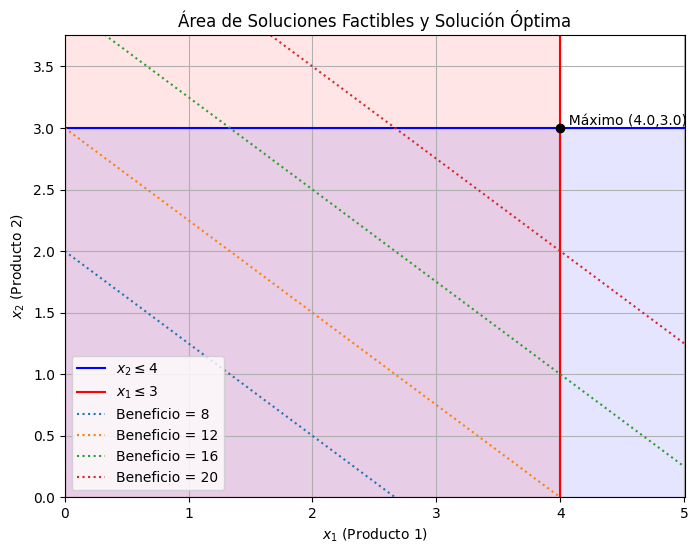

In [41]:
import pulp
import matplotlib.pyplot as plt
import numpy as np
# @title Ejemplo de código usando PuLP
# @markdown A coninuación, Definiremos cada uno de los parámetros
# Crear un problema de maximización
prob = pulp.LpProblem("Maximizar Beneficio", pulp.LpMaximize)
beneficio_Producto_1 = 3 #@param
beneficio_Producto_2 = 4 #@param
limite_producto_1 = 4 #@param
limite_producto_2 = 3 #@param
# Definir variables
x1 = pulp.LpVariable("x1", 0) # Producto 1
x2 = pulp.LpVariable("x2", 0) # Producto 2

# Función objetivo
prob += beneficio_Producto_1 * x1 + beneficio_Producto_2 * x2, "Beneficio Total"

# Restricciones
prob += x1 <= limite_producto_1
prob += x2 <= limite_producto_2

# Resolver el problema
prob.solve()

# Imprimir resultados
print("Resultados:")
for v in prob.variables():
    print(v.name, "=", v.varValue)

print("Beneficio Total:", pulp.value(prob.objective))

# Creando el rango de valores para x1 y x2
x1_g = np.linspace(0, max(limite_producto_1,limite_producto_2)*1.25, 400)
x2_g = np.linspace(0, max(limite_producto_1,limite_producto_2)*1.25, 400)

# Restricciones
x2_restriccion1 = limite_producto_2 * np.ones_like(x1_g)  # x2 <= 3
x1_restriccion2 = limite_producto_1 * np.ones_like(x2_g)  # x1 <= 4

# Creando el área de soluciones factibles
plt.figure(figsize=(8, 6))

# Restricciones y límites
plt.plot(x1_g, x2_restriccion1, label=f'$x_2 \leq {limite_producto_1}$', color='blue')
plt.fill_between(x1_g, 0, x2_restriccion1, alpha=0.1, color='blue')
plt.plot(x1_restriccion2, x2_g, label=f'$x_1 \leq {limite_producto_2}$', color='red')
plt.fill_betweenx(x2_g, 0, x1_restriccion2, alpha=0.1, color='red')

# Líneas de nivel de la función objetivo
z_values = [8, 12, 16, 20]
for z in z_values:
    plt.plot(x1_g, (z - beneficio_Producto_1 * x1_g) / beneficio_Producto_2, label=f'Beneficio = {z}', linestyle='dotted')

# Punto óptimo (solución)
plt.plot(x1.varValue, x2.varValue, 'ko')  # Punto negro para la solución
plt.text(x1.varValue, x2.varValue, f'  Máximo ({x1.varValue},{x2.varValue})', verticalalignment='bottom')

# Configuración del gráfico
plt.xlim(0, limite_producto_1*1.251)
plt.ylim(0, limite_producto_2*1.251)
plt.xlabel('$x_1$ (Producto 1)')
plt.ylabel('$x_2$ (Producto 2)')
plt.title('Área de Soluciones Factibles y Solución Óptima')
plt.legend()
plt.grid(True)

# Mostrar gráfico
plt.show()



Este código resolverá el problema planteado, mostrando cuantas unidades de cada producto fabricar para maximizar el beneficio, respetando las restricciones de producción.